In [ ]:
pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.2/349.2 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.9/801.9 kB 42.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 46.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 11.5 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pygam to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 34.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (2

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import tree
import pydotplus


import plotly.express as px
import scipy.stats as stats
import matplotlib.image as pltimg


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import ttest_ind
from numpy.lib.function_base import average
from ISLP import confusion_table
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculatio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataframe = pd.read_csv('/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.csv')

In [ ]:
dataframe.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [ ]:
dataframe.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
#Averaging Sleep Duration by Occupation
grouped_data = dataframe.groupby("Occupation")

for occupation, group in grouped_data:
  sleep_avg = group['Sleep Duration'].mean()
  print(f"Occupation {occupation}, Sleep Duration {sleep_avg}")



Occupation Accountant, Sleep Duration 7.113513513513515
Occupation Doctor, Sleep Duration 6.970422535211269
Occupation Engineer, Sleep Duration 7.987301587301586
Occupation Lawyer, Sleep Duration 7.4106382978723415
Occupation Manager, Sleep Duration 6.9
Occupation Nurse, Sleep Duration 7.0630136986301375
Occupation Sales Representative, Sleep Duration 5.9
Occupation Salesperson, Sleep Duration 6.403125
Occupation Scientist, Sleep Duration 6.0
Occupation Software Engineer, Sleep Duration 6.75
Occupation Teacher, Sleep Duration 6.69


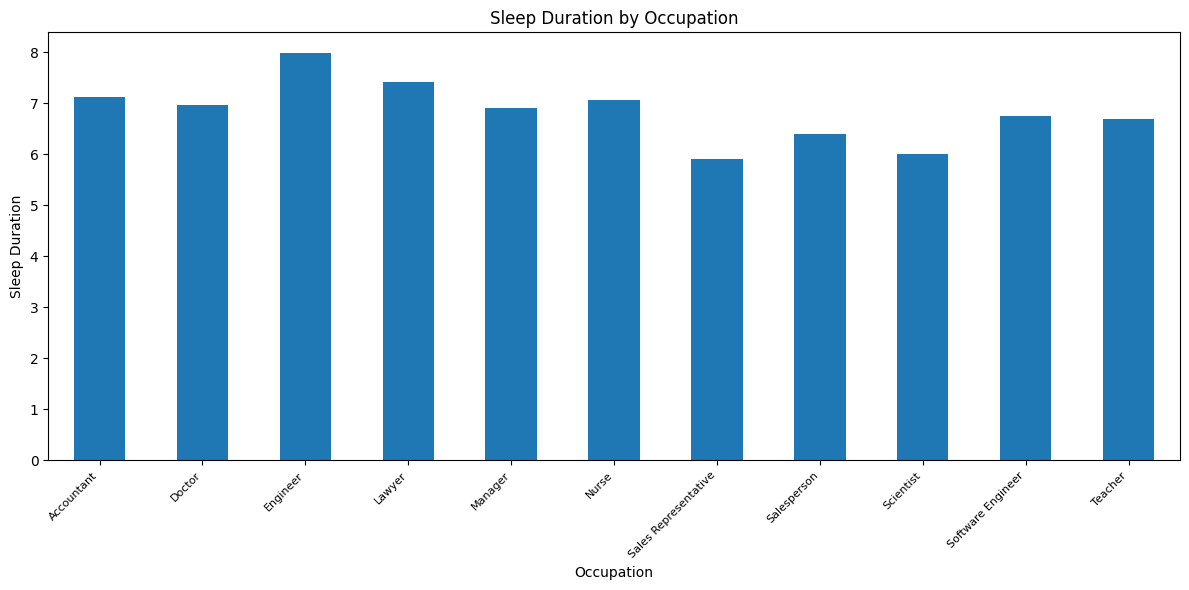

In [ ]:
sleep_duration_by_occupation = dataframe.groupby('Occupation')['Sleep Duration'].mean()

plt.figure(figsize=(12, 6))
sleep_duration_by_occupation.plot(kind='bar')
plt.xlabel('Occupation')
plt.ylabel('Sleep Duration')
plt.title('Sleep Duration by Occupation')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.subplots_adjust(bottom=0.3)
plt.tight_layout()
plt.show()
#most sleep engineers
#least sleep sales representatives

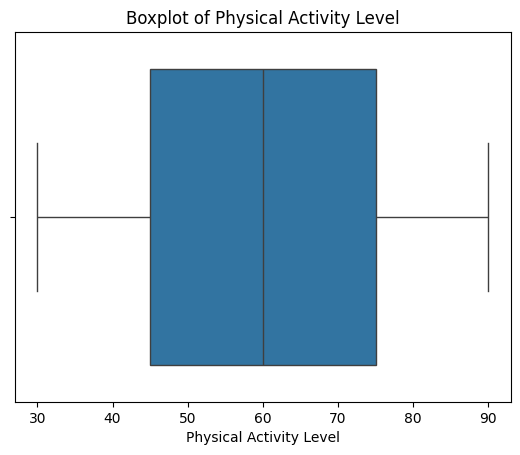

In [ ]:
#Visual 2
#Boxplot of Physical Activity Level
sns.boxplot(x='Physical Activity Level', data = dataframe)
plt.title('Boxplot of Physical Activity Level')
plt.show()

In [ ]:
dataframe.describe()
#checked for nan and any anomomilies, there were none !!! ty kaggle

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Prediction 1 :LDA MODEL

In [ ]:
pip install scikit-learn


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import cross_val_score, KFold



In [ ]:
#Prediction 1
#LDA MODEl
#use "daily steps" to predict "occupation"
X = dataframe[['Daily Steps']]  # Predictor
y = dataframe['Occupation']  # Response

train = dataframe['Age'] < 30
weekly_train = dataframe.loc[train]
weekly_test = dataframe.loc[~train]



In [ ]:
y = dataframe.Occupation
y_train, y_test = y.loc[train], y.loc[~train]

In [ ]:
weekly_train = weekly_train[['Daily Steps']]
weekly_test = weekly_test[['Daily Steps']]

In [ ]:
lda = LDA(store_covariance=True)

In [ ]:
lda.fit(weekly_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/covariance/_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(


LinearDiscriminantAnalysis(store_covariance=True)

In [ ]:
lda_pred = lda.predict(weekly_test)

In [ ]:
confusion_table(lda_pred, y_test)
#modeling is over predicting dr.
#model thinks that if your daily steps are you are a dr.

Truth,Accountant,Doctor,Engineer,Lawyer,Manager,Nurse,Sales Representative,Salesperson,Scientist,Software Engineer,Teacher
Predicted,,,,,,,,,,,
Accountant,0,0,0,0,0,0,0,0,0,0,0
Doctor,37,30,23,44,0,66,0,32,0,2,33
Engineer,0,0,0,0,0,0,0,0,0,0,0
Lawyer,0,0,0,0,0,0,0,0,0,0,0
Manager,0,0,0,0,0,0,0,0,0,0,0
Nurse,0,25,40,1,1,5,0,0,4,0,6
Sales Representative,0,0,0,2,0,0,0,0,0,0,0
Salesperson,0,0,0,0,0,0,0,0,0,0,0
Scientist,0,0,0,0,0,0,0,0,0,0,0


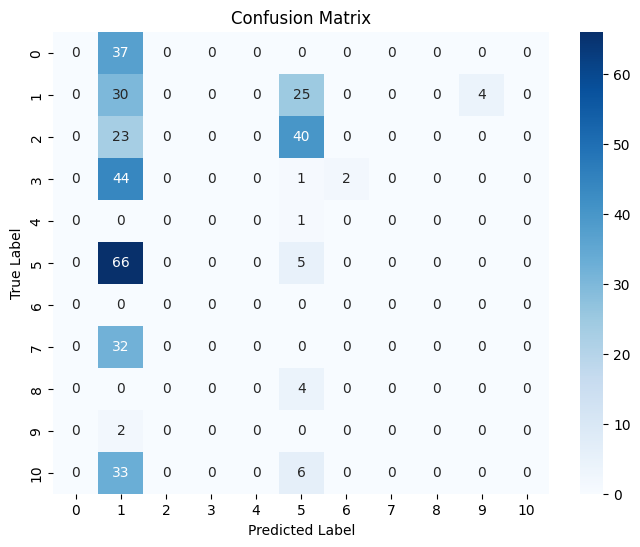

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, lda_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
#model is overpredicting doctors.

In [ ]:
lda_accuracy = accuracy_score(y_test, y_pred)
print(f"Prediction Accuracy: {lda_accuracy:.2f}")

Prediction Accuracy: 0.10


In [ ]:
dataframe.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Prediction 2: Decision Tree

In [ ]:
#using multiple features to try and predict Sleep Disorder
feature_cols = ['Age', 'Sleep Duration', "Quality of Sleep", "Physical Activity Level","Stress Level","Heart Rate","Daily Steps"]
X = dataframe[feature_cols] #the features
y = dataframe['Sleep Disorder'] #target

In [ ]:
#split into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

In [ ]:
#clf = DecisionTreeClassifier()
clf = DecisionTreeClassifier(max_depth = 4)
clf = clf.fit(X_train,y_train)

In [ ]:
#your predictions
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array(['None', 'None', 'None', 'None', 'None', 'Insomnia', 'None', 'None',
       'None', 'None', 'Insomnia', 'None', 'None', 'None', 'None',
       'Sleep Apnea', 'None', 'Insomnia', 'None', 'None', 'None', 'None',
       'None', 'Insomnia', 'Insomnia', 'None', 'Insomnia', 'Insomnia',
       'Insomnia', 'Sleep Apnea', 'None', 'None', 'None', 'Sleep Apnea',
       'Sleep Apnea', 'None', 'None', 'None', 'None', 'None', 'Insomnia',
       'Sleep Apnea', 'Insomnia', 'Insomnia', 'None', 'None', 'None',
       'None', 'Sleep Apnea', 'None', 'Sleep Apnea', 'Insomnia',
       'Sleep Apnea', 'None', 'Insomnia', 'Sleep Apnea', 'Insomnia',
       'Sleep Apnea', 'Sleep Apnea', 'None', 'None', 'Insomnia', 'None',
       'None', 'Insomnia', 'None', 'Insomnia', 'None', 'None',
       'Sleep Apnea', 'None', 'Insomnia', 'None', 'Sleep Apnea',
       'Sleep Apnea', 'Insomnia', 'None', 'None', 'Sleep Apnea',
       'Insomnia', 'None', 'Sleep Apnea', 'None', 'None', 'None',
       'Sleep Apnea', 'None', 

In [ ]:
#this gives the probably of being 0 as the first element, and the probability of being 1 for the second
clf.predict_proba(X_test)

In [ ]:
#to see how accurate your predictions were, use the true y's and the predicted y's
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#good accuracy score :P

Accuracy: 0.8849557522123894


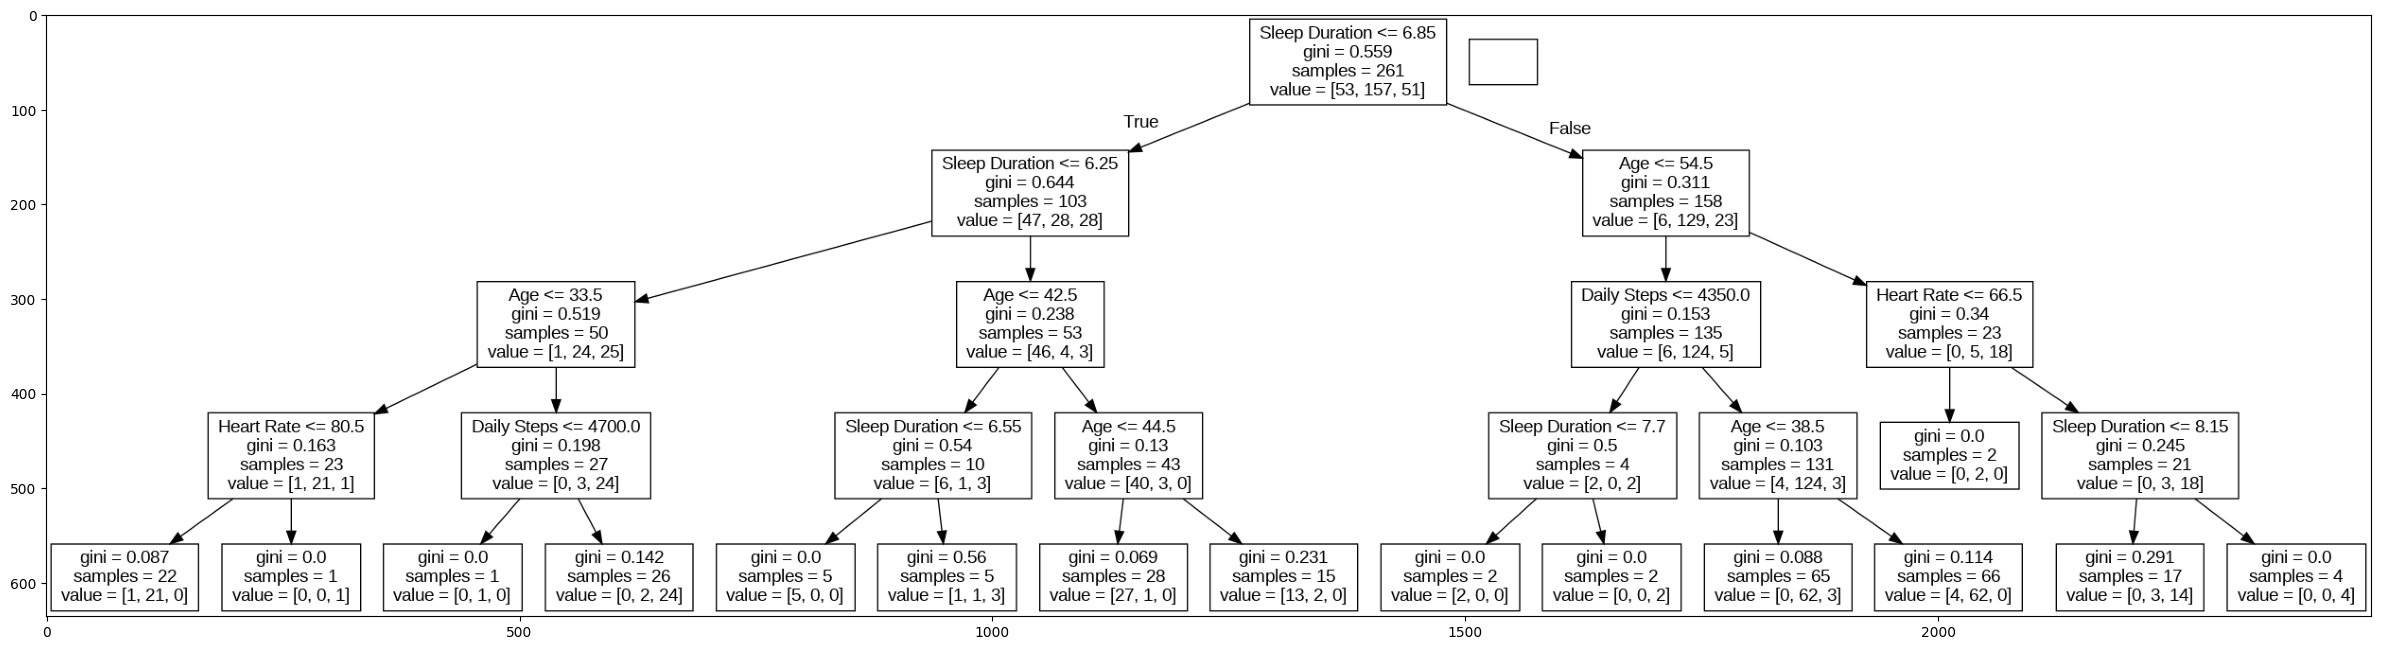

In [ ]:
#this is just a way to get a glimpse at what the first few choices were
plt_2 = plt.figure(figsize=(30, 30))
data = tree.export_graphviz(clf, out_file=None, feature_names=feature_cols)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree2.png')
img=pltimg.imread('mydecisiontree2.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8761061946902655


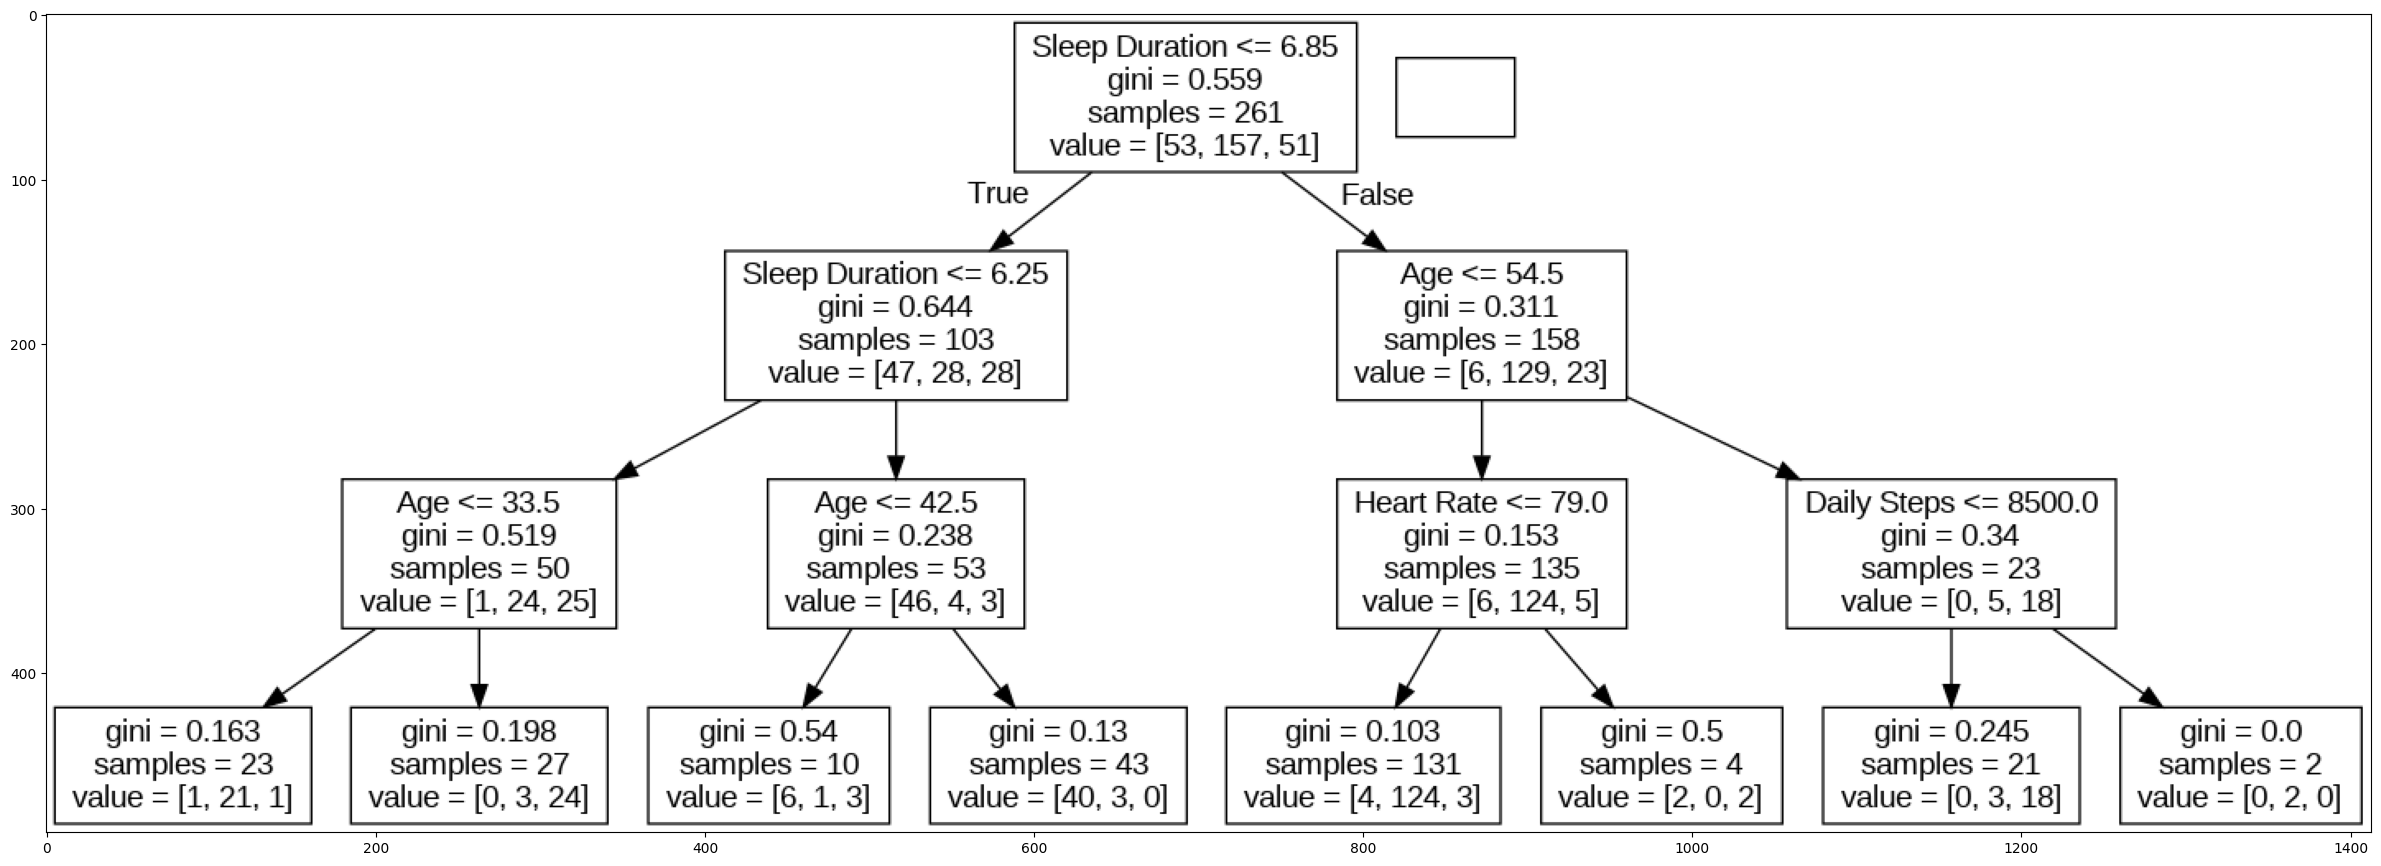

In [ ]:
plt_2 = plt.figure(figsize=(30, 30))
data = tree.export_graphviz(clf, out_file=None, feature_names=feature_cols)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree2.png')
img=pltimg.imread('mydecisiontree2.png')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
importance = clf.feature_importances_

In [ ]:
clf.feature_importances_

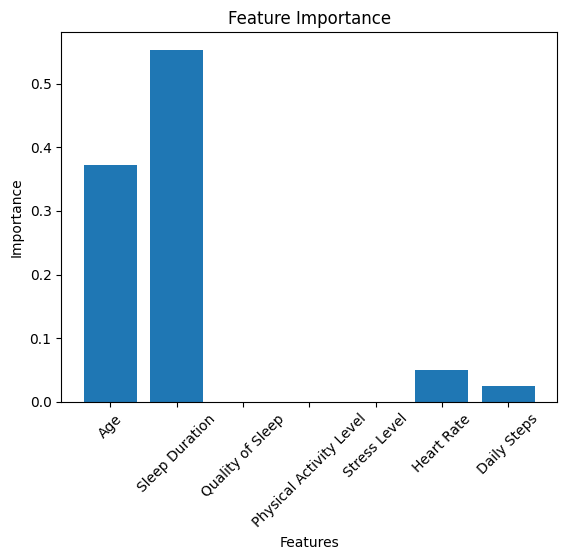

In [ ]:
plt.bar(feature_cols, importance)
plt.xticks(rotation=45)

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()
#highest importance is sleep duration then age, daily steps, and physical activity. Lastly hearthate and quality of sleep.

In [ ]:
#Example of encoding and cross validating.
X = dataframe[['Daily Steps']]
y = dataframe['Occupation'].factorize()[0]

kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = DecisionTreeClassifier(random_state=42)

scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
print(f'Average accuracy: {scores.mean():.2f}')

Average accuracy: 0.46


In [ ]:
#TUNING
def plot_decision_tree_tuning_chart(X, y, max_depths):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    train_scores = []
    test_scores = []

    for depth in max_depths:

        dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)

        dt_classifier.fit(X_train, y_train)

        y_train_pred = dt_classifier.predict(X_train)
        y_test_pred = dt_classifier.predict(X_test)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        train_scores.append(train_accuracy)
        test_scores.append(test_accuracy)

    plt.figure(figsize=(10, 6))
    plt.plot(max_depths, train_scores, '-o', label='Train Accuracy')
    plt.plot(max_depths, test_scores, '-o', label='Test Accuracy')
    plt.title('Decision Tree Tuning Chart')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Accuracy Score')
    plt.xticks(max_depths)
    plt.legend()
    plt.grid(True)
    plt.show()

X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

max_depths_to_test = np.arange(1, 11)

plot_decision_tree_tuning_chart(X, y, max_depths_to_test)

#depth of 4 gives the best accuracy score :)

In [ ]:
#FEATURE SELECTION

def plot_feature_selection_tuning_chart(X, y, num_predictors):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    train_scores = []
    test_scores = []

    for num_features in num_predictors:

        selector = SelectKBest(f_classif, k=num_features)
        X_train_selected = selector.fit_transform(X_train, y_train)
        X_test_selected = selector.transform(X_test)

        dt_classifier = DecisionTreeClassifier(random_state=42)

        dt_classifier.fit(X_train_selected, y_train)

        y_train_pred = dt_classifier.predict(X_train_selected)
        y_test_pred = dt_classifier.predict(X_test_selected)

        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        train_scores.append(train_accuracy)
        test_scores.append(test_accuracy)

    plt.figure(figsize=(10, 6))
    plt.plot(num_predictors, train_scores, '-o', label='Train Accuracy')
    plt.plot(num_predictors, test_scores, '-o', label='Test Accuracy')
    plt.title('Feature Selection Tuning Chart')
    plt.xlabel('Number of Predictors')
    plt.ylabel('Accuracy Score')
    plt.xticks(num_predictors)
    plt.legend()
    plt.grid(True)
    plt.show()



feature_cols1 = ['Age', 'Sleep Duration', "Quality of Sleep", "Physical Activity Level","Stress Level","Heart Rate","Daily Steps"]
X = dataframe[feature_cols1]
y = dataframe['Sleep Disorder']

num_predictors_to_test = np.arange(1, len(feature_cols1) + 1)

plot_feature_selection_tuning_chart(X, y, num_predictors_to_test)
#just 1 features gives the lowest accuracy score after that 2+ features it maxes out the possible highest
#accurcy score at approx 88%
